In [1]:
!pip install python-interface

In [2]:
!pip install chart_studio

In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import chart_studio.plotly as py
from plotly.offline import iplot, plot

In [4]:
from CarFactory import CarFactory
from Street import Street, StreetRamp, StreetAuto
from Constants import *
from Cars import *

## Experiment 0: Visualization of two road


In [5]:
# car_prob and auto_prob are independent Probability
#prob_auto, prob_car = .5, .5
prob_auto, prob_car = 0.0, 0.8 
num_lane = 2
#road_length = 500 # 5 km
road_length = 112.654 # 0.7mile
flow_in = 2 # vehicle per second

#Vehicle wait to join: 1.0
-----------------------------------------------------------------
time = 1140.50
total vehicle:   19, average speed 3.33, flow in 12.50 vehicle/s, flow out 12.14 vehicle/s
	 num cars in each lane [ 9. 10.]
-----------------------------------------------------------------
#Vehicle wait to join: 1.0
-----------------------------------------------------------------
time = 1200.50
total vehicle:   16, average speed 3.28, flow in 0.68 vehicle/s, flow out 0.72 vehicle/s
	 num cars in each lane [8. 8.]
-----------------------------------------------------------------
#Vehicle wait to join: 1.0
-----------------------------------------------------------------
time = 1260.50
total vehicle:   17, average speed 3.52, flow in 0.68 vehicle/s, flow out 0.72 vehicle/s
	 num cars in each lane [8. 9.]
-----------------------------------------------------------------
#Vehicle wait to join: 1.0
-----------------------------------------------------------------
time = 1320.50
tot

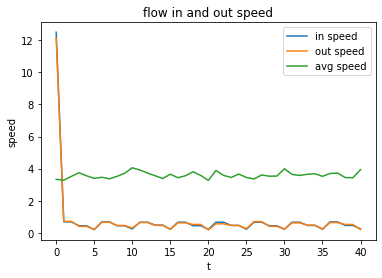

In [33]:
# car_prob and auto_prob are independent Probability
#prob_auto, prob_car = .5, .5
prob_auto, prob_car = 0.0, 0.8 
num_lane = 2
#road_length = 500 # 5 km
road_length = 112.654 # 0.7mile
flow_in = 2 # vehicle per second

from re import T
cf = CarFactory(prob_auto, prob_car)
road = Street(num_lane, road_length, cf)
dt = 0.5
traffic_light_duration = 40 / dt
cross_line_len = 6.1
cross_line_start = road_length / 4
cross_line_end = cross_line_start + cross_line_len
s0 = 2 # least safe distance between cars
in_speed = []
out_speed = []
avg_speed = []

from Cars import *
for i in range(int(3600 / dt)):
  road.update(flow_in)
  if (i >= 2280 and i % 120 == 0):
    # print(road.street)
    # print(type(road.street))
    # no_human_car = [car for car in road.street if not isinstance(car, CarHuman)]
    # print("this is current street")
    # print(no_human_car)
    print("#Vehicle wait to join:" , road.vehicle_wait)
    in_speed.append(road.flow_in_speed)
    out_speed.append(road.flow_out_speed)
    avg_speed.append(road.report())

plt.plot(in_speed, label='in speed')
plt.plot(out_speed, label='out speed')
plt.plot(avg_speed, label='avg speed')
plt.title('flow in and out speed')
plt.xlabel('t')
plt.ylabel('speed')
plt.legend()


In [12]:
from re import T
cf = CarFactory(prob_auto, prob_car)
road = Street(num_lane, road_length, cf)
dt = 0.5
traffic_light_duration = 40 / dt
cross_line_len = 6.1
cross_line_start = road_length / 4
cross_line_end = cross_line_start + cross_line_len
s0 = 2 # least safe distance between cars
initial_red = 30
from Cars import *
from Cars import ShadowCar


In [35]:
isRed = False
light_count = 0
addshadow = False
shadow_num = 0
import copy
from re import T
cf = CarFactory(prob_auto, prob_car)
road = Street(num_lane, road_length, cf)
dt = 0.5
traffic_light_duration = 60 / dt #red light duration is 1min
cross_line_len = 6.1
cross_line_start = road_length / 4
cross_line_end = cross_line_start + cross_line_len
s0 = 2 # least safe distance between cars
initial_red = 1500
oss_line_len = 6.1
cross_line_start = road_length / 4
cross_line_end = cross_line_start + cross_line_len
s0 = 2 # least safe distance between cars
initial_red = 2400 #20min start red 
in_speed = []
out_speed = []
avg_speed = []
isVisited = []
human_shadow = []

from Cars import *
from Cars import ShadowCar

for t in range(int(3600 / dt)):

  # Todo: (少min判断pos和长度，参照first)
  # Todo: 添加周期性红绿灯

  if t == initial_red:
    isRed = True
    addShadow = True
  
  if(isRed and addShadow):
    temp_road = copy.deepcopy(road)
    temp_street = list(copy.deepcopy(road.street))
    cur_length = int(len(temp_street))

    for i in range(cur_length - 1, -1, -1):
      car = temp_street[i]
      # if current car position is greater than abnormal area end, break
      if car.pos > cross_line_end:
        break
      # if current car position is less than abnormal area start, continue
      if car.pos < cross_line_start:
        continue
      
      #find the first car on each lane in the affected area
      if car.lane not in isVisited:
        print("11")
        idx_prev_car = temp_road.prev_index_on_lane(car.lane, i)
        prev_car_same_lane = temp_street[idx_prev_car]
        shadow_pos = prev_car_same_lane.pos + prev_car_same_lane.length + s0
        shadow_pos = max(cross_line_start, shadow_pos)

        #add first shadow car
        if shadow_pos + car.length + s0 < car.pos:
          print("12")
          shadow_length = car.pos - shadow_pos - s0
          if (shadow_length > 0):
            print("21")
            new_shadow_car = ShadowCar(shadow_pos, car.lane, shadow_length, traffic_light_duration)
            temp_street.append(new_shadow_car)
            shadow_num += 1
        isVisited.append(car.lane)
      
      #find the next car of current car
      idx_next_car = temp_road.next_index_on_lane(car.lane, i)
      next_car_same_lane = temp_street[idx_next_car]

      # current car is the last one in the affected area (少min判断pos和长度，参照first)
      if next_car_same_lane.pos > cross_line_end:
        print("13")
        shadow_pos = car.pos + car.length + s0
        shadow_pos = min(shadow_pos, cross_line_end)
        shadow_length = next_car_same_lane.pos - shadow_pos - s0
        if (shadow_length > 0):
          print("22")
          new_shadow_car = ShadowCar(shadow_pos, car.lane, shadow_length, traffic_light_duration)
          temp_street.append(new_shadow_car)
          shadow_num += 1

      # current car is not the last one in the affected area
      elif next_car_same_lane.pos < cross_line_end:
        print("14")
        shadow_pos = car.pos + car.length + s0
        shadow_length = next_car_same_lane.pos - shadow_pos - s0
        if (shadow_length > 0):
          print("23")
          new_shadow_car = ShadowCar(shadow_pos, car.lane, shadow_length, traffic_light_duration)
          temp_street.append(new_shadow_car)
          shadow_num += 1

      # change the current car to a shadow car
      human_shadow.append(copy.deepcopy(car))
      new_shadow_car = ShadowCar(car.pos, car.lane, car.length, traffic_light_duration)
      new_shadow_car.isNormalCar = True
      temp_street[i] = new_shadow_car

    if (shadow_num > 0) :
      print("we have " + str(shadow_num) + " new shadow cars")
    if (len(human_shadow) > 0) :
      print("we have " + str(len(human_shadow)) + " human shadow cars")
    
    # update the car positions on new road
    temp_road.street = copy.deepcopy(temp_street)
    temp_road.sort()
    road = copy.deepcopy(temp_road)
    addShadow = False

    
    # if (len(human_shadow) > 1) :
    #   print("we have " + str(len(human_shadow)) + " human shadow cars")
  
  if t == initial_red + traffic_light_duration:
    if (isRed):
      temp_road = copy.deepcopy(road)
      temp_street = list(copy.deepcopy(road.street))
      cur_length = int(len(temp_street))
      
      for j in range(cur_length - 1, -1, -1):
        car = temp_street[j]   
        # if current car position is less than abnormal area start, continue
        if car.pos < cross_line_start:
          continue  
        # if current car position is greater than abnormal area end, break
        if car.pos > cross_line_end:
          break
        
        #remove shadow car when light is green
        if isinstance(car, ShadowCar):
          if car.isNormalCar:
            temp_street[j] = copy.deepcopy(human_shadow[0])
            human_shadow.pop(0)
          else:
            temp_street.remove(car)
          shadow_num -= 1
      
      temp_road.street = copy.deepcopy(temp_street)
      temp_road.sort()
      road = copy.deepcopy(temp_road)
    
    isRed = False
    initial_red = t + traffic_light_duration
    isVisited = []

  road.update(flow_in)
    
  if (t >= 2280 and t % 120 == 0):
    # if (len(human_shadow) > 0):
    #   print("we have " + str(len(human_shadow)) + " human shadow cars")
    # if (shadow_num > 0) :
    #   print("we have " + str(shadow_num) + " new shadow cars")
    # print("#Vehicle wait to join:" , road.vehicle_wait)

    in_speed.append(road.flow_in_speed)
    out_speed.append(road.flow_out_speed)
    avg_speed.append(road.report())

  
  # if len(isVisited) > 0:
  #   print(isVisited)

  # if t >= 1000 and t % 100 == 0:
  #   # if len(isVisited) > 0:
  #   #   print(isVisited)
    
  #   road.report()
  #   print(road.street)
  #   print(type(road.street))

  #   # no_human_car = [car for car in road.street if not isinstance(car, CarHuman)]
  #   # print("this is current street")
  #   # print(no_human_car)
  #   print("#Vehicle wait to join:" , road.vehicle_wait)  

-----------------------------------------------------------------
time = 1140.50
total vehicle:   19, average speed 3.87, flow in 12.44 vehicle/s, flow out 12.08 vehicle/s
	 num cars in each lane [10.  9.]
-----------------------------------------------------------------
-----------------------------------------------------------------
time = 1200.50
total vehicle:   18, average speed 3.44, flow in 0.68 vehicle/s, flow out 0.70 vehicle/s
	 num cars in each lane [9. 9.]
-----------------------------------------------------------------
-----------------------------------------------------------------
time = 1260.50
total vehicle:   17, average speed 3.69, flow in 0.68 vehicle/s, flow out 0.70 vehicle/s
	 num cars in each lane [9. 8.]
-----------------------------------------------------------------
11
13
22
we have 1 new shadow cars
we have 1 human shadow cars
-----------------------------------------------------------------
time = 1320.50
total vehicle:   21, average speed 3.18, flow in

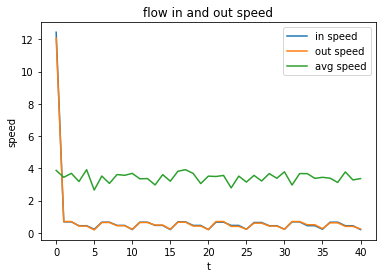

In [36]:
plt.plot(in_speed, label='in speed')
plt.plot(out_speed, label='out speed')
plt.plot(avg_speed, label='avg speed')
plt.title('flow in and out speed')
plt.xlabel('t')
plt.ylabel('speed')
plt.legend()

In [ ]:
from re import T
cf = CarFactory(prob_auto, prob_car)
road = Street(num_lane, road_length, cf)
dt = 0.5
traffic_light_duration = 40 / dt
cross_line_len = 6.1
cross_line_start = road_length / 4
cross_line_end = cross_line_start + cross_line_len
s0 = 2 # least safe distance between cars
from Cars import *
from Cars import ShadowCar

# for i in range(1000 / dt):
isRed = False
light_count = 0
import copy
for i in range(int(3600 / dt)):
  road.update(flow_in)
  if 2 * light_count * traffic_light_duration <= i and i < (2 * light_count + 1) * traffic_light_duration:
    isRed = True
    human_shadow = {}
    new_shadow = []
    temp_road = copy.deepcopy(road)
    temp_street = list(copy.deepcopy(road.street))
    cur_length = int(len(temp_street))
    isFirst = True
    isLast = False
  
    shadow_num = 0
    for i in range(cur_length):
      # current car and shadow car
      car = temp_street[i]
      new_shadow_car = None
      
      # if current car position is less than abnormal area start, continue
      if car.pos < cross_line_start:
        continue
      
      # if current car position is greater than abnormal area end, break
      if car.pos > cross_line_end:
        break
      
      # if current car is the first car in the abnormal area
      if isFirst:

        # add a new shadow if there is more space between abnormal area start and first car
        if car.pos - cross_line_start > car.length + s0:
          new_shadow_car = ShadowCar(car.pos - s0, car.lane, car.length)
          temp_street.append(new_shadow_car)
          new_shadow.append(copy.deepcopy(new_shadow_car))
          shadow_num += 1
        isFirst = False

      # find the next car of current one on the same lane
      idx_next_car = temp_road.next_index_on_lane(car.lane, i)
      next_car_same_lane = temp_street[idx_next_car]
      
      # if the next car position is greater than the abnormal end that means we find the last car in that area
      if next_car_same_lane.pos > cross_line_end:
        isLast = True
      
      # if current car is last car, 
      if isLast:
        # add a new shadow if there is more space between abnormal area end and last car and break the iteration
        if cross_line_end - car.pos > car.length + s0:
          new_shadow_car = ShadowCar(car.pos + s0, car.lane, car.length)
          temp_street.append(new_shadow_car)
          new_shadow.append(copy.deepcopy(new_shadow_car))
          shadow_num += 1
        break

      #### the below case if for the current car that is not the first or last in the area ####
      
      # add a new shadow if there is more space between current car and its next one
      if next_car_same_lane.pos - car.pos >= 2 * s0 + car.length:
        new_shadow_car = ShadowCar(car.pos + s0, car.lane, car.length)
        temp_street.append(new_shadow_car)
        new_shadow.append(copy.deepcopy(new_shadow_car))
        shadow_num += 1
      
      # change the current car to a shadow car
      human_shadow[i] = copy.deepcopy(car)
      new_shadow_car = ShadowCar(car.pos, car.lane, car.length)
      temp_street[i] = new_shadow_car
      shadow_num += 1
  
  road.street = temp_street


      #   
      # road.redLight()





      # num_shadow = 

      # [        [da shadow    ]          ]
      # [        [s s s new_s s]          ]

      # # should have right light
      # road.update(flow_in)
  if i % 100 == 0:
      road.report()
      print(road.street)
      print(type(road.street))
      print([car for car in road.street if isinstance(car, ShadowCar)])
      # no_human_car = [car for car in road.street if not isinstance(car, CarHuman)]
      # print("this is current street")
      # print(no_human_car)
      print("#Vehicle wait to join:" , road.vehicle_wait)  

In [ ]:
#Same condition, but 50% auto
prob_auto, prob_car = .5, .8
#prob_auto, prob_car = 0.0, 1.0 
num_lane = 2
#road_length = 500 # 5 km
road_length = 112.654 # 0.7mile
flow_in = 2 # vehicle per second

In [ ]:
cf = CarFactory(prob_auto, prob_car)
road_polite = Street(num_lane, road_length, cf)
for i in range(1000):
    road_polite.update(flow_in)


    if i % 100 == 0:
        road_polite.report()
        print("#Vehicle wait to join", road_polite.vehicle_wait)

In [ ]:
import plotly.graph_objs as go
color_map = dict()
color_map['0'] = 'rgb(255, 0, 0)' # Red
color_map['1'] = 'rgb(255, 174, 0)' # Yellow(Orange?)
color_map['2'] = 'rgb(0, 255, 0)' # Green
color_map['3'] = 'rgb(0, 204, 204)' # Light -Blue
color_map['4'] = 'rgb(0, 0, 255)' # Blue

def generate_fig(road):
    '''
    Input:
        street = list of "Moveable" --> Car or CarHuman
    Return:
        plolty fig
    '''
    lane_width = 5 # 5 m
    traces = []
    for car in road.street:
        #print(int(car.vel/5.5))
        trace = go.Scatter(x = [car.pos, car.pos+car.length],
                           y = [car.lane + 1, car.lane + 1],
                           mode = 'lines',
                           # the color is based on the velocity m/s of the car 
                           marker = dict( color = color_map['{}'.format(int(car.vel / (5.5)))] 
                                           ))
        traces.append(trace)
    layout = go.Layout(title='traffic simulation at time {:6.1f}s'.format(road.time),
                       xaxis=dict(title='distance (meters)'),
                       yaxis=dict(title='lane number',
                                    showgrid=True,
                                    zeroline=False,
                                    showline=False,
                                    showticklabels=True),
                       showlegend=False)
    return go.Figure(data= traces, layout=layout)

In [ ]:
fig1 = generate_fig(road)
fig2 = generate_fig(road_polite)  # add 0.5 polite driver

In [ ]:
import plotly.offline as py1
py1.iplot(fig1)
py1.iplot(fig2)

  ## Experiment 1: Diffferent Initial Speed
  

In [ ]:
# car_prob and auto_prob are independent Probability
# only contain car, no truck
#
#prob_auto, prob_car = .5, .5
prob_auto, prob_car = 0.0, 0.8
num_lane = 2
#road_length = 500 # 5 km
road_length = 112.654 # 0.7mile
flow_in = 2 # vehicle per second
dt = 0.5

In [ ]:
from CarFactory_v import CarFactory_v as CarFactory

def speed_v(num_lane,v0):
   # car_prob and auto_prob are independent Probability
    prob_auto, prob_car = 0, 0.8
    flow_in = 2
    # road_length = 1310
    road_length = 112.654 #0.7mile

    dt = 0.5
    #prob_ramp = 0.25
    cf = CarFactory(prob_auto, prob_car, v0_car = v0)
    road = Street(num_lane, road_length, cf,  dt=dt)
    speed_avg = []

    for i in range(1, int(500 / dt)):
        road.update(flow_in)
        speed = np.mean([car.vel for car in road.street])
        if np.isnan(speed): 
          speed = 0
        speed_avg.append(speed)
        if i % 500 == 0:
            road.report()
#            print(speed_avg)
#         if i % 400 == 0:
#             fig = generate_fig(road)
#             plot(fig, image='png', filename='image{:04d}.html'.format(int(i/400)), image_filename='image{:04d}'.format(int(i/400)))
    return np.mean(speed_avg) *3.6

In [ ]:
#from CarFactory_v import CarFactory 

def speed_v_auto(num_lane,v0,prob_auto = 0.5):
   # car_prob and auto_prob are independent Probability
    prob_auto, prob_car = 0.5, 0.8
    flow_in = 2
    # road_length = 1310
    road_length = 112.654 #0.7mile

    dt = 0.5
    #prob_ramp = 0.25
    cf = CarFactory(prob_auto, prob_car, v0_car = v0)
    road = Street(num_lane, road_length, cf,  dt=dt)
    speed_avg = []

    for i in range(1, int(500 / dt)):
        road.update(flow_in)
        speed = np.mean([car.vel for car in road.street])
        if np.isnan(speed): 
          speed = 0
        speed_avg.append(speed)
        if i % 500 == 0:
            road.report()
#            print(speed_avg)
#         if i % 400 == 0:
#             fig = generate_fig(road)
#             plot(fig, image='png', filename='image{:04d}.html'.format(int(i/400)), image_filename='image{:04d}'.format(int(i/400)))
    return np.mean(speed_avg) *3.6

In [ ]:
# only human car

v0s = np.arange(10, 40.1, 2) #kmh
    
performance = []
for v0 in v0s:
    print("############################################")
    print("initial speed = {:2.2f}".format(v0))
    print("############################################")
    performance.append(speed_v(2,v0))


In [ ]:
# only human car

v0s = np.arange(10, 40.1, 2) #kmh
    
performance_auto = []
for v0 in v0s:
    print("############################################")
    print("initial speed = {:2.2f}".format(v0))
    print("############################################")
    performance_auto.append(speed_v_auto(2,v0))


In [ ]:
plt.plot(v0s, performance, label='No auto')
plt.plot(v0s, performance_auto, label='0.5 auto')
plt.title('Avg speed with different V0')
plt.xlabel('V0(km/h)')
plt.ylabel('average speed (km/h)')
plt.legend()

## Experiment 2: Relationship: Auto car ratio v.s. Average speed

change the ratio of AutoCar, and look for the average speed change

* car_prob = 0.8

* speed_limit = 25 MPH = 40.23 KMH

* flow_in = 1.31 v/s = 4725 v/h **Need Clarification**

* flow_in_ramp = 0.44 v/s = 1575 v/h

* flow_in_total = 1.75 v/s = 6300 v/h

* mile_post_dist = 0.821 mile = 1.31 km

In [ ]:
# Use Street()
def speed_auto(auto, num_lane):
   # car_prob and auto_prob are independent Probability
    prob_auto, prob_car = auto, 0.6
    flow_in = 2
    # road_length = 1310
    road_length = 112.654 #0.7mile

    dt = 0.5
    #prob_ramp = 0.25

    cf = CarFactory(prob_auto, prob_car)
    road = Street(num_lane, road_length, cf,  dt=dt)
    speed_avg = []

    for i in range(1, int(500 / dt)):
        road.update(flow_in)
        speed = np.mean([car.vel for car in road.street])
        if np.isnan(speed): 
          speed = 0
        speed_avg.append(speed)
        if i % 500 == 0:
            road.report()
            print(speed_avg)
#         if i % 400 == 0:
#             fig = generate_fig(road)
#             plot(fig, image='png', filename='image{:04d}.html'.format(int(i/400)), image_filename='image{:04d}'.format(int(i/400)))
    return np.mean(speed_avg)

In [ ]:
auto_ratio = np.arange(0, 1.01, 0.1)
performance3 = []
num_lane = 2
for auto in auto_ratio:
    print("############################################")
    print("auto car ratio = {:2.2f}".format(auto))
    print("############################################")
    performance3.append(speed_auto(auto, num_lane))


In [ ]:
print(auto_ratio)
print(performance3)
plt.plot(auto_ratio, performance3, label='no dedicate lanes')
#plt.plot(auto_ratio, performance3_dedicate, label='with dedicate lanes')
plt.title('2 main lane')
plt.xlabel('autonomous car ratio')
plt.ylabel('average speed (m/s)')
plt.legend()

In [ ]:
# Use StreetRamp
'''
    Let lane 0 be the on ramp, where the road is closed from 1/3 of the roadlength.
'''

def speed_auto(auto, num_lane):
    prob_auto, prob_car = auto, 0.8
    flow_in = 1.31
    # road_length = 1310
    road_length = 112.654 #0.7mile

    dt = 0.5
    prob_ramp = 0.5

    cf = CarFactory(prob_auto, prob_car)
    road = StreetRamp(num_lane, road_length, cf, prob_ramp, dt=dt)
    speed_avg = []

    for i in range(1, int(500 / dt)):
        road.update(flow_in)
        speed_avg.append(np.mean([car.vel for car in road.street]))
        if i % 500 == 0:
            road.report()
#         if i % 400 == 0:
#             fig = generate_fig(road)
#             plot(fig, image='png', filename='image{:04d}.html'.format(int(i/400)), image_filename='image{:04d}'.format(int(i/400)))
    return np.mean(speed_avg)

In [ ]:
auto_ratio = np.arange(0, 1.01, 0.1)
performance3_ramp = []
num_lane = 2
for auto in auto_ratio:
    print("############################################")
    print("auto car ratio = {:2.2f}".format(auto))
    print("############################################")
    performance3_ramp.append(speed_auto(auto, num_lane))


In [ ]:

plt.plot(auto_ratio, performance3, label='no ramp')
plt.plot(auto_ratio, performance3_ramp, label='have ramp')
plt.title('2 main lane')
plt.xlabel('autonomous car ratio')
plt.ylabel('average speed (m/s)')
plt.legend()

## Experiment 3 Average Speed VS Number of Line

In [ ]:
def speed_human_lane(lane):
    prob_auto, prob_car = 0, 0.8
    flow_in = 2
    #road_length = 1310
    road_length = 112.654 #0.7mile
    dt = 0.5
    #prob_ramp = 0.25
    num_lane = lane

    cf = CarFactory(prob_auto, prob_car)
    #road = StreetRamp(num_lane, road_length, cf, prob_ramp, dt=dt)
    road = Street(num_lane, road_length, cf, dt=dt)
    speed_avg = []

    for i in range(1, int(500 / dt)):
        road.update(flow_in)
        
        speed = np.mean([car.vel for car in road.street])
        if np.isnan(speed): 
          speed = 0
        speed_avg.append(speed)

        #speed_avg.append(np.mean([car.vel for car in road.street]))

        if i % 200 == 0:
            road.report()
    return np.mean(speed_avg)

In [ ]:
lanes = [2,3,4,5,6,7,8]
performance_lane = []
for lane in lanes:
    print("############################################")
    print("auto car ratio = {:2d}".format(lane))
    print("############################################")
    performance_lane.append(speed_human_lane(lane))

In [ ]:
plt.plot(lanes, performance_lane)
plt.title('performance v.s. number of lanes')
plt.xlabel('number of lanes')
plt.ylabel('average speed (m/s)')
plt.axhline(y=25, color='r', linestyle='--')
plt.legend()